# [Introduction to LangChain](https://python.langchain.com/docs/introduction/)

LangChain is a framework for developing applications powered by large language models (LLMs).

LangChain simplifies every stage of the LLM application lifecycle:

- Development: Build your applications using LangChain's open-source [components](https://python.langchain.com/docs/concepts/) and [third-party integrations](https://python.langchain.com/docs/integrations/providers/). Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.
- Productionization: Use [LangSmith](https://docs.smith.langchain.com/?_gl=1*lbz7dz*_ga*MTg3MzIxNzgyNS4xNzU0ODgzNTUz*_ga_47WX3HKKY2*czE3NTQ5MDgwMDgkbzQkZzEkdDE3NTQ5MTAwMTckajYwJGwwJGgw) to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.
- Deployment: Turn your LangGraph applications into production-ready APIs and Assistants with [LangGraph Platform](https://docs.langchain.com/langgraph-platform?__hstc=5909356.bc36eceb44175eebbb2b372b7bd252b1.1754883571704.1754883571704.1754910222298.2&__hssc=5909356.2.1754910222298&__hsfp=2562008206&_gl=1*iime50*_gcl_au*NTc3MzUwMjY4LjE3NTQ5MTAyMDM.*_ga*MTg3MzIxNzgyNS4xNzU0ODgzNTUz*_ga_47WX3HKKY2*czE3NTQ5MDgwMDgkbzQkZzEkdDE3NTQ5MTAyNDkkajYwJGwwJGgw).

LangChain implements a standard interface for large language models and related technologies, such as embedding models and vector stores, and integrates with hundreds of providers. See the integrations page for more.

<img src="https://python.langchain.com/svg/langchain_stack_112024_dark.svg" width="800">

LangChain uses LLMs to build applications for various use cases. Created by Harrison Chase, it was first released as an open-source project in October 2022. To date (11-8-25), it has accumulated `113K` stars on [GitHub](https://github.com/langchain-ai/langchain) and has over `3.7k+` contributors.

<img src="https://atsailabstorage.blob.core.windows.net/atsusecases/langchain-starhistory.png" width="800">
Source: [LangChain Star History](https://www.star-history.com/#langchain-ai/langchain&Date)

In [3]:
import os
from dotenv import load_dotenv

In [4]:
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

## Chat Models
https://js.langchain.com/docs/integrations/chat/

In [5]:
# Method 1
from langchain_groq import ChatGroq
model = ChatGroq(model="openai/gpt-oss-120b", temperature=0)

In [6]:
# Method 2
from langchain.chat_models import init_chat_model
LLM = init_chat_model(model="groq:openai/gpt-oss-120b")

In [8]:
r = LLM.invoke("Hi!")
r.content

'Hello! How can I help you today?'

## Prompts Templates
A prompt is the text we give to the LLM (or ChatModel). <br>
LangChain provides special classes like PromptTemplate and ChatPromptTemplate to make prompts dynamic and reusable.

In [9]:
# Single Input Variable
from langchain_core.prompts import PromptTemplate

template = PromptTemplate(
    template= "Explain {topic} in simple Term"
)

prompt = template.format(topic = "Large Language Language")
prompt

'Explain Large Language Language in simple Term'

In [10]:
response = model.invoke(prompt)
response.content

'**Large Language Model (LLM) – Simple Explanation**\n\nImagine you have a huge library of books, articles, chats, and all kinds of written text. A **large language model** is a computer program that has read (or been trained on) that massive collection of words and sentences. By “reading” all that text, the model learns how language works—how words fit together, what ideas usually follow each other, and how to answer questions or write new text that sounds natural.\n\n### How It Works (in everyday language)\n\n| Step | What Happens | Simple Analogy |\n|------|-------------|--------------|\n| **1. Learning from lots of text** | The model reads billions of words. | Like a child listening to many conversations and stories. |\n| **2. Spotting patterns** | It notices which words often appear together and how sentences are built. | Like noticing that “peanut butter” often goes with “jelly”. |\n| **3. Building a “brain”** | It creates a huge network of tiny math units (called *parameters*) t

In [11]:
# ChatPromptTemplate 
from langchain_core.prompts import ChatPromptTemplate

template = ChatPromptTemplate.from_messages([
    ("system", "You are helpfull assistent"),
    ("user", "Summarize the concept of {concept} in 3 bullet points.")
])

message = template.format(concept = "Large Language Model")
message

'System: You are helpfull assistent\nHuman: Summarize the concept of Large Language Model in 3 bullet points.'

In [12]:
response = model.invoke(message)
response.content

'- **Statistical pattern learners:** Large Language Models (LLMs) are neural networks trained on massive text corpora to predict the next word (or token) given its context, learning statistical patterns of language rather than explicit rules.\n\n- **Scale and capability:** By scaling up the number of parameters (often billions) and the amount of training data, LLMs acquire broad knowledge and can perform diverse tasks—translation, summarization, reasoning—through simple prompting.\n\n- **Probabilistic generation:** LLMs output a probability distribution over possible next tokens, allowing them to generate coherent, context‑aware text, but they lack true understanding or consciousness; their outputs reflect learned patterns and may contain errors or biases.'

- SystemMessage -- for content which should be passed to direct the conversation
- HumanMessage -- for content in the input from the user.
- AIMessage -- for content in the response from the model.

In [13]:
# Using Message Types
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import AIMessage, SystemMessage, HumanMessage

template = ChatPromptTemplate.from_messages([
    SystemMessage(content="You are a wise and slightly humorous AI mentor."),
    HumanMessage(content="Can you explain LangChain in one sentence?"),
    AIMessage(content="LangChain is a Python framework that helps you build apps powered by large language models."),
    HumanMessage(content="Great! Can you also give me one real-world use case?")
])

message = template.format_messages()
message

[SystemMessage(content='You are a wise and slightly humorous AI mentor.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Can you explain LangChain in one sentence?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='LangChain is a Python framework that helps you build apps powered by large language models.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Great! Can you also give me one real-world use case?', additional_kwargs={}, response_metadata={})]

In [14]:
model.invoke(message).content

'**Use‑case example:**\u202fA SaaS company builds a **customer‑support chatbot** with LangChain that pulls the latest product documentation, ticket history, and FAQ articles into a single LLM‑driven assistant—so when a user asks “How do I reset my API key?” the bot can instantly retrieve the relevant policy, walk the user through the steps, and even log the interaction for future analytics, all without writing a custom retrieval‑augmented‑generation pipeline from scratch.'

## Chain in LangChain
A Chain is basically a pipeline that connects multiple steps together, where the output of one step becomes the input of the next.
https://python.langchain.com/api_reference/langchain/chains.html

### 1. Single-Step Chain (LLMChain)
This is the simplest form — Prompt → LLM → Output.

In [51]:
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain

prompt = PromptTemplate(
    input_variables=["topic"],
    template="Explain {topic} in simple terms and add one fun fact."
)

chain = LLMChain(llm=model, prompt=prompt)

result = chain.invoke("Quantum Computing")
result

{'topic': 'Quantum Computing',
 'text': '**Quantum Computing in a nutshell**\n\n1. **Bits vs. Qubits**  \n   - *Classical computers* use **bits** that are either **0** or **1**.  \n   - *Quantum computers* use **qubits** that can be **0, 1, or both at the same time** (thanks to a property called **super‑position**).\n\n2. **Super‑position**  \n   Imagine a spinning coin. While it’s spinning, you can’t say it’s heads *or* tails—it’s effectively both until you look. A qubit works similarly: it holds many possibilities at once, letting a quantum computer explore many solutions in parallel.\n\n3. **Entanglement**  \n   When two qubits become **entangled**, the state of one instantly influences the other, no matter how far apart they are. This creates a kind of “instant‑communication” link that lets quantum computers coordinate many calculations at once.\n\n4. **Why it matters**  \n   Because a quantum computer can process many possibilities simultaneously, it can solve certain problems (li

In [16]:
# Runnable chain
# Use pipe | operator to make a chain
from langchain_core.output_parsers import StrOutputParser

chain = prompt | model | StrOutputParser()
res = chain.invoke("Cloud Computing")
res

'**What is cloud computing?**  \nThink of the cloud as a giant, always‑available “digital library” that lives on the internet instead of on your own computer or phone. Instead of storing files, running programs, or doing calculations on a single device, you “borrow” the power and storage of big, remote computers (called servers) that are kept in special data‑center buildings. You can access your data and apps from any device that’s connected to the internet—just like you can read a book from a library no matter where you are, as long as you have a library card.\n\n**Simple analogy:**  \nImagine you’re a chef who wants to bake a cake. Instead of buying a huge oven, all the ingredients, and a kitchen for every single cake you make, you go to a shared kitchen (the cloud). You pay only for the time you use the oven, the space you need, and the tools you need. When you’re done, you leave the kitchen clean and ready for the next chef. The cloud works the same way for software, storage, and e

### 2. Multi-Step Chain (SimpleSequentialChain)
This combines two LLM steps, first create an outline, then expand it into a blog post.

In [17]:
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain
from langchain_core.output_parsers import StrOutputParser

outline_prompt = PromptTemplate(
    input_variables=["topic"],
    template="Create a 3-point outline for a blog post about {topic}."
)

outline_chain = LLMChain(llm=model, prompt=outline_prompt)

# Step 2: Content generator
content_prompt = PromptTemplate(
    input_variables=["outline"],
    template="Expand this outline into a detailed 200-word blog post:\n{outline}"
)
content_chain = LLMChain(llm=model, prompt=content_prompt)

# Combine into one chain
blog_chain = SimpleSequentialChain(chains=[outline_chain, content_chain])

# Run the full pipeline
final_result = blog_chain.invoke("The Future of Renewable Energy")
print(final_result)


{'input': 'The Future of Renewable Energy', 'output': '**The Future of Renewable Energy**\n\nThe renewable‑energy landscape is undergoing a rapid transformation, driven by breakthroughs that were once science‑fiction. **Advanced solar solutions** such as perovskite cells promise efficiencies above 30\u202f%, while bifacial panels harvest light from both sides, boosting output without extra land. Floating solar farms now dot reservoirs and coastal lagoons, turning water surfaces into power generators. In the wind sector, **offshore floating turbines** can be anchored in deep water where winds are strongest, and high‑altitude kite or airborne wind systems capture jet‑stream energy that traditional turbines can’t reach. Meanwhile, **solid‑state batteries**, hydrogen‑based storage, and AI‑driven grid optimization promise to smooth the intermittent nature of sun and wind, turning intermittent power into reliable, dispatchable energy.\n\nEconomic and policy forces are accelerating this shift

In [18]:
# Runnable chain
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain
from langchain_core.output_parsers import StrOutputParser

outline_prompt = PromptTemplate(
    input_variables=["topic"],
    template="Create a 3-point outline for a blog post about {topic}."
)

outline_chain = outline_prompt | model | StrOutputParser()

content_prompt = PromptTemplate(
    input_variables=["outline"],
    template="Expand this outline into a detailed 200-word blog post:\n{outline}"
)
content_chain = content_prompt | model | StrOutputParser()

blog_chain = outline_chain | content_chain | model | StrOutputParser()

# Run the full pipeline
final_result = blog_chain.invoke({"The Future of Renewable Energy"})
print(final_result)

**The Future of Renewable Energy – A Quick‑Take Overview**

---

### 1. Key Technological Trends

| **Sector** | **Breakthroughs** | **Why It Matters** |
|-----------|------------------|------------------|
| **Solar** | • **Perovskite cells** – > 30 % lab efficiencies, low‑cost roll‑to‑roll production.<br>• **Bifacial panels** – capture light on both sides → + 20‑30 % output.<br>• **Solar‑glass & building‑integrated PV** – windows, façades become power generators. | Drives higher energy yield per‑m² and turns existing surfaces into generators. |
| **Wind** | • **Floating offshore turbines** – access high‑speed, stable winds far from coast.<br>• **Bladeless (vortex‑induced) turbines** – low noise, minimal maintenance.<br>• **AI‑optimized farm layouts** – maximize kW per hectare, cut CAPEX. | Expands viable sites (deep water, constrained land) and reduces O&M costs. |
| **Storage** | • **Solid‑state batteries** – higher energy density, safer chemistry.<br>• **Power‑to‑hydrogen** – conver

##  Memory in LangChain
By default, LangChain calls are stateless, the model only sees the current input and forgets everything else.
https://python.langchain.com/api_reference/langchain/memory.html <br>
https://python.langchain.com/docs/versions/migrating_memory/

In [21]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Prompt template
prompt = PromptTemplate(
    input_variables=["question"],
    template="""
    You are a friendly chatbot.
    User: {question}
    Assistant:
    """)

# Create chain
chain = prompt | model | StrOutputParser()

In [24]:
response = chain.invoke("Hi! I am Saad")
response

'Hi Saad! 👋 Great to meet you. How’s your day going so far?'

In [25]:
response = chain.invoke("Can you remeber my name?")
response

'I’m afraid I don’t have your name yet—could you remind me? 😊 Once you tell me, I’ll keep it in mind for the rest of our chat!'

### ConversationBufferMemory
- Stores: Full conversation history.
- Use: Small chats where cost & token limits aren’t an issue.
- Pro: Simple and easy.
- Con: Can grow too large for long sessions.

In [30]:
from langchain.memory import ConversationBufferMemory
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Create Memory
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# Prompt template
prompt = PromptTemplate(
    input_variables=["chat_history", "question"],
    template="""
    You are an AI Assistant for **Advanced Telecom Services (ATS)**.
    Conversation so far:
    {chat_history}
    User: {question}
    Assistant:
    """
)

# Create chain
chain = LLMChain(llm=model, prompt=prompt, memory=memory)

In [32]:
response = chain.run("Hi!, My name is Saad, How can you help me?")
response

'Hello Saad! 👋  \n\nI’m here to make your experience with **Advanced Telecom Services (ATS)** as smooth and enjoyable as possible. Whether you’re looking for:\n\n- **Mobile or internet plan recommendations**  \n- **Bill details or payment assistance**  \n- **Troubleshooting a service issue** (e.g., no signal, slow internet, billing errors)  \n- **Information on new offers, devices, or upgrades**  \n\njust let me know what you need, and I’ll guide you through it.  \n\nWhat would you like help with today? (Feel free to be as specific as you like—e.g., “I want a new data‑plan for my family,” or “My internet is down, what should I do?”)'

In [33]:
response = chain.run("Can you remeber, What's my name?")
response

'Your name is **Saad**. How can I assist you further today?'

# LLM-Powered Chatbot with Conversation History

We'll go over an example of how to design and implement an LLM-powered chatbot. This chatbot will be able to have a **conversation** and **remember previous interactions** with a chat model.

Source: [LangChain Docs](https://python.langchain.com/docs/tutorials/chatbot/)

In [2]:
from langchain.chat_models import init_chat_model

model = init_chat_model("openai/gpt-oss-120b", model_provider="groq")

`ChatModels` in LangChain work like special objects called "Runnables", which means they have a common way you can use them.
If you just want to run the model, you give it a list of messages and use the `.invoke` method — that’s how you “talk” to it and get a response.

It’s like: “Put your messages in a box, hand it to the .invoke button, and the model will answer.”

In [3]:
from langchain_core.messages import HumanMessage

model.invoke([HumanMessage(content="Hi! I am Ahmed.")])

AIMessage(content='Hello Ahmed! 👋 Nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi! I am Ahmed." We should greet them, ask how we can help. Follow guidelines: be friendly, no disallowed content.'}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 77, 'total_tokens': 141, 'completion_time': 0.120820524, 'prompt_time': 0.004475829, 'queue_time': 0.043859801, 'total_time': 0.125296353}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_085e8f07e2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c3abdf58-20a1-4bd1-9a64-bdf1993ed035-0', usage_metadata={'input_tokens': 77, 'output_tokens': 64, 'total_tokens': 141})

The model on its own does not have any concept of state. For example, if you ask a followup question:

In [4]:
model.invoke([HumanMessage(content="What's my name?")])

AIMessage(content='I don’t have any information about your name. Could you let me know what you’d like me to call you?', additional_kwargs={'reasoning_content': 'The user asks "What\'s my name?" We have no prior conversation. The user hasn\'t provided their name. According to policy, we cannot guess or fabricate personal info. We can ask for clarification. So we should respond asking for their name or stating we don\'t have that info.'}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 75, 'total_tokens': 164, 'completion_time': 0.160853452, 'prompt_time': 0.004359095, 'queue_time': 0.050482512, 'total_time': 0.165212547}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_4a19b1544c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--03c8295e-9a28-4f76-8821-7c871b485d5a-0', usage_metadata={'input_tokens': 75, 'output_tokens': 89, 'total_tokens': 164})

We can see that it doesn't take the previous conversation turn into context, and cannot answer the question. This makes for a terrible chatbot experience!

To get around this, we need to pass the entire [conversation history](https://python.langchain.com/docs/concepts/chat_history/) into the model. Let's see what happens when we do that:

In [7]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I am Ahmed."),
        AIMessage(
            content="Hello Ahmed! 👋 Nice to meet you. How can I assist you today?"
        ),
        HumanMessage(content="Who am I?"),
    ]
)

AIMessage(content='You introduced yourself as **Ahmed**. If there’s anything specific you’d like to share or discuss—whether it’s a question, a topic you’re interested in, or something you need help with—just let me know! 😊', additional_kwargs={'reasoning_content': 'User asks "Who am I?" They introduced themselves as Ahmed. We can respond with a friendly answer, maybe ask for more details. Should be brief.'}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 108, 'total_tokens': 196, 'completion_time': 0.158821381, 'prompt_time': 0.005547022, 'queue_time': 0.001862829, 'total_time': 0.164368403}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_45f51928b5', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--9a1e0998-3784-486d-9f82-d205a284d320-0', usage_metadata={'input_tokens': 108, 'output_tokens': 88, 'total_tokens': 196})

And now we can see that we get a good response!

This is the basic idea underpinning a chatbot's ability to interact conversationally. So how do we best implement this?

# Message persistence

LangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.

Wrapping our chat model in a minimal LangGraph application allows us to automatically persist the message history, simplifying the development of multi-turn applications.

LangGraph comes with a simple in-memory checkpointer, which we use below. See its [documentation](https://langchain-ai.github.io/langgraph/concepts/persistence/?_gl=1*fi5jbl*_gcl_au*MTE0NDQ3MDcyNC4xNzU0OTExODMx*_ga*MTU2Mzg1ODA3NS4xNzQ5NjMyNjk5*_ga_47WX3HKKY2*czE3NTQ5MTE4MjYkbzckZzEkdDE3NTQ5MTE4MzckajQ5JGwwJGgw) for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).

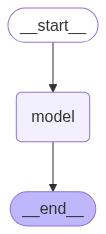

In [12]:
# Modern usage with LangGraph: Production-friendly way to store chat state.
from langgraph.checkpoint.memory import MemorySaver 
from langgraph.graph import START, MessagesState, StateGraph

# Define a new graph
workflow = StateGraph(state_schema=MessagesState)


# Define the function that calls the model
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": response}


# Define the (single) node in the graph
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)
app

We now need to create a `config` that we pass into the runnable every time. This config contains information that is not part of the input directly, but is still useful. In this case, we want to include a `thread_id`. This should look like:

In [13]:
config = {"configurable": {"thread_id": "abc123"}}

This enables us to support multiple conversation threads with a single application, a common requirement when your application has multiple users.

We can then invoke the application:

In [35]:
query = "Hi! I am Ahmed."

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config)

output

{'messages': [HumanMessage(content='Hi! I am Ahmed.', additional_kwargs={}, response_metadata={}, id='84e8f04b-9fc0-495f-b3ae-12b8feaf24a3'),
  AIMessage(content='Hello Ahmed! 👋 Nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi! I am Ahmed." We should greet them, ask how we can help. Follow guidelines: be friendly, no disallowed content.'}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 77, 'total_tokens': 141, 'completion_time': 0.115650252, 'prompt_time': 0.004500526, 'queue_time': 0.001688329, 'total_time': 0.120150778}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_ce855234b5', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d01c1df4-c72c-455b-bc07-80a42675dd85-0', usage_metadata={'input_tokens': 77, 'output_tokens': 64, 'total_tokens': 141}),
  HumanMessage(content='Do you know my name?', additional_kwargs={}, response_metada

In [32]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Yes, you told me your name is **Ahmed**. 😊 Is there anything specific you’d like to talk about or need help with today?


In [20]:
query = "Do you know my name?"

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Yes, you introduced yourself as **Ahmed**. How can I help you today, Ahmed?


Great! Our chatbot now remembers things about us. If we change the config to reference a different `thread_id`, we can see that it starts the conversation fresh.

In [24]:
new_config = {"configurable": {"thread_id": "xyz890"}}

query = "Do you know my name?"

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config=new_config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

I don’t have any information about your name unless you’ve shared it with me in this conversation. If you’d like me to address you by name, just let me know what you’d like to be called!


However, we can always go back to the original conversation (since we are persisting it in a database)

In [25]:
query = "Do you know my name?"

input_messages = [HumanMessage(query)]

output = app.invoke({"messages": input_messages}, config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Yes, you told me your name is **Ahmed**. 😊 Is there anything specific you’d like to talk about or need help with today?


This is how we can support a chatbot having conversations with many users!